In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, balanced_accuracy_score, ConfusionMatrixDisplay, auc
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel("preclampsia_data.xlsx")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
data.head(5)

,PREG_WK,TGT,AL,ALK,ALT,AST,BUN,CAL,CHOL,CR_SE,CRP,ESR,Gamma,Glu,Hb,K,Mg,PLT,Tbil,Tco2,Tpro,Uric,Urine_AC,Urine_PC,WBC,SBP,DBP,PROTEIN,T3_1_1,T3_1_2,T3_1_3
0,29,0,1.365829,25.979899,7.979899,10.844221,4.701508,3.095477,95.105528,0.271910,2.819211,5.432161,0.070352,46.422111,0.233668,1.595477,0.126080,162.698492,0.164322,7.201005,2.395477,1.498492,35.223104,0.253166,7.426332,113.000000,74.00000,14.703518,158.0,47.000000,40.0
1,33,0,1.698741,46.916877,6.729323,9.411028,4.682161,4.140554,118.806045,0.320980,1.611801,3.186398,0.083123,54.984887,0.206297,2.152141,0.057280,167.727500,0.230479,10.309824,3.023250,1.930982,12.093224,0.119547,7.415315,113.000000,71.00000,8.008816,158.0,48.700000,40.0
2,25,0,3.900000,51.000000,13.000000,17.000000,9.200000,8.200000,176.000000,0.700000,0.971920,1.604502,0.633441,90.000000,0.053055,0.514469,0.005563,228.000000,0.400000,2.429260,6.500000,3.800000,0.404148,0.012235,9.450000,112.285714,66.87259,0.555466,160.0,60.735464,60.0
3,27,0,0.889062,16.174479,4.483117,5.935065,2.830130,2.070312,55.432292,0.174000,3.532307,2.067708,0.549479,30.127604,0.239844,1.054167,0.053880,195.671795,0.115365,4.601562,1.563939,0.988281,1.096771,0.109609,8.205547,94.000000,50.00000,6.240625,160.0,66.800000,60.0
4,31,0,1.330052,29.689119,15.808786,13.426357,3.852850,2.988083,84.248705,0.287902,2.420697,3.691710,0.461140,47.950777,0.259326,1.845078,0.070337,136.661499,0.199741,8.821244,2.318863,1.370725,1.879171,0.142461,6.060415,101.000000,63.00000,8.716580,160.0,68.000000,60.0


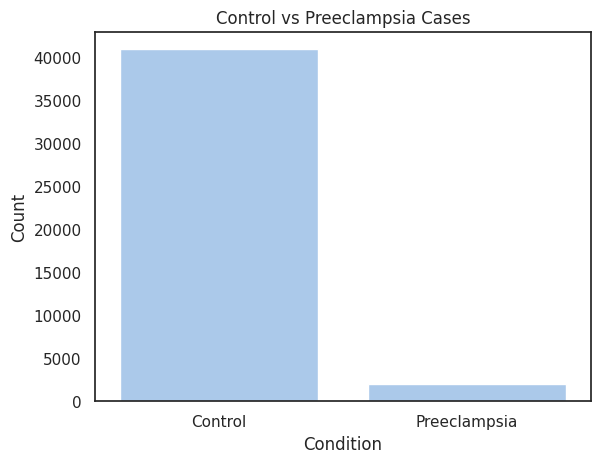

In [ ]:
#distribition of people with preeclampsia vs those without
data['TGT'] = data['TGT'].map({0: "Control", 1: "Preeclampsia"})

sns.countplot(x = 'TGT', data = data)
plt.title("Control vs Preeclampsia Cases")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

In [ ]:
data['TGT'] = data['TGT'].map({"Control": 0, "Preeclampsia": 1})

In [ ]:
#summary statistics by Group
grouped_stats = data.groupby("TGT").describe().T
grouped_stats

TGT                        0             1
PREG_WK  count  40936.000000   2029.000000
         mean      30.363299     30.797930
         std        2.870543      2.829748
         min       25.000000     25.000000
         25%       28.000000     29.000000
         50%       31.000000     32.000000
         75%       33.000000     33.000000
         max       34.000000     34.000000
AL       count  40936.000000   2029.000000
         mean       2.101079      2.388945
         std        1.045232      1.514685
         min        0.232222      0.232222
         25%        1.310484      1.543182
         50%        1.635021      2.600000
         75%        3.227119      3.222764
         max        5.200000     56.300000
ALK      count  40936.000000   2029.000000
         mean      58.427244     77.447963
         std       40.190549     48.468619
         min        4.111111      4.111111
         25%       26.956647     36.066116
         50%       46.916877     77.000000
         75%       93.627907    108.000000
         max     1112.000000    628.000000
ALT      count  40936.000000   2029.000000
         mean      12.781995     19.974329
         std       16.713541     29.716807
         min        1.022222      1.022222
         25%        6.382775      8.222749
         50%        9.511111     14.000000
         75%       16.078431     20.700000
         max     1432.000000    411.000000
AST      count  40936.000000   2029.000000
         mean      15.767029     24.797780
         std       18.429173     41.545528
         min        1.022222      1.022222
         25%        8.137536     10.944751
         50%       13.006329     20.166667
         75%       21.440559     26.691176
         max     1433.000000   1327.000000
BUN      count  40936.000000   2029.000000
         mean       5.710573      9.892171
         std        3.236695      8.196736
         min        0.540000      0.540000
         25%        3.716827      4.498758
         50%        4.665153      7.876400
         75%        7.876400     11.500000
         max      102.200000     60.100000
CAL      count  40936.000000   2029.000000
         mean       5.162878      6.143466
         std        2.793860      2.615319
         min        0.570000      0.570000
         25%        2.989595      3.492222
         50%        3.905720      7.500000
         75%        8.348760      8.365865
         max       10.500000     10.400000
CHOL     count  40936.000000   2029.000000
         mean     148.133317    185.790816
         std       83.669555     96.232163
         min       14.277778     14.277778
         25%       84.236994     97.575758
         50%      114.680085    212.000000
         75%      240.951220    249.400000
         max      566.000000    792.000000
CR_SE    count  40936.000000   2029.000000
         mean       0.398559      0.655802
         std        0.247921      0.716890
         min        0.045667      0.045667
         25%        0.240417      0.320876
         50%        0.320980      0.550000
         75%        0.530345      0.710000
         max       10.170000      6.600000
CRP      count  40936.000000   2029.000000
         mean       5.780286      7.064683
         std        9.770918     10.026674
         min        0.100000      0.100000
         25%        1.947500      2.000000
         50%        2.729664      3.742682
         75%        7.525000      9.086939
         max      356.350000    128.700000
ESR      count  40936.000000   2029.000000
         mean       3.728711      3.961138
         std        5.713103      5.907157
         min        0.340741      0.340741
         25%        2.143817      2.127895
         50%        2.903671      2.903671
         75%        3.838756      3.838756
         max      120.000000     86.000000
Gamma    count  40936.000000   2029.000000
         mean       9.625413     11.512934
         std       18.344678     17.779953
         min        0.025316      0.025316
 

### Removing Outliers

In [ ]:
#cleaning the outliers
def remove_outliers(df,columns):
    cleaned_data = df.copy()
    for col in columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        cleaned_data = cleaned_data[(cleaned_data[col]>=lower) & (cleaned_data[col]<=upper)]
    return cleaned_data

In [ ]:
features_with_outliers = [
    'AL', 'ALK', 'ALT', 'AST', 'BUN', 'CHOL', 'CRP', 'ESR', 'Gamma',
    'Hb', 'Mg', 'PLT', 'Tbil', 'Urine_AC', 'Urine_PC', 'WBC',
    'SBP', 'DBP', 'PROTEIN'
]

cleaned_data = remove_outliers(data, features_with_outliers)

print(f"Original shape: {data.shape}")
print(f"Cleaned shape: {cleaned_data.shape}")


Original shape: (42965, 31)
Cleaned shape: (15935, 31)


In [ ]:
cleaned_data['TGT'].value_counts()

,count
TGT,
0,15632
1,303


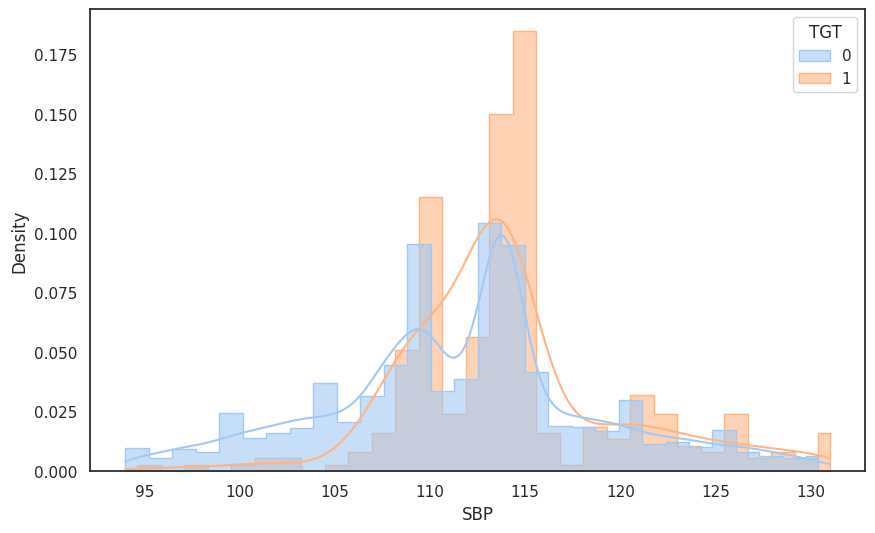

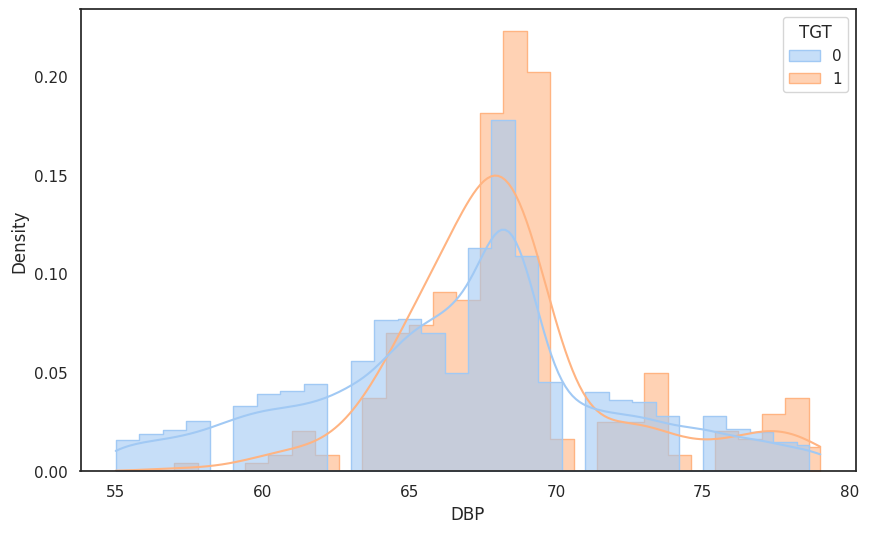

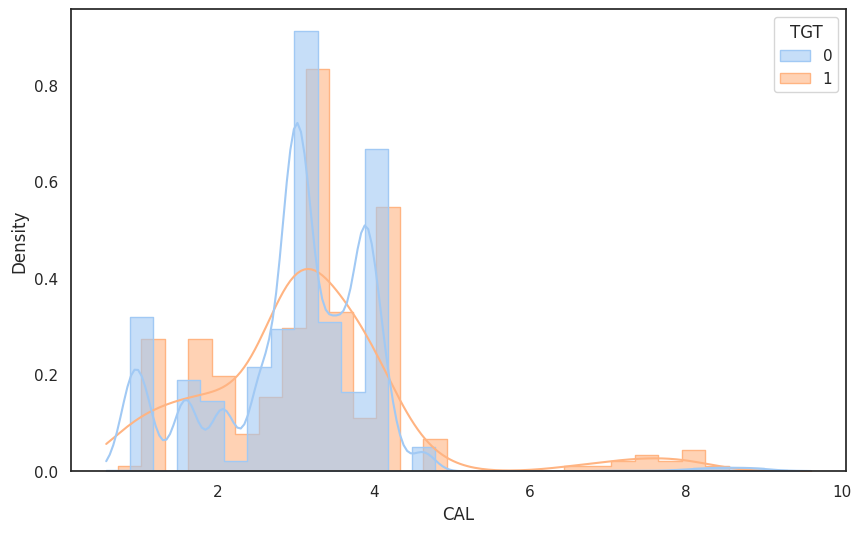

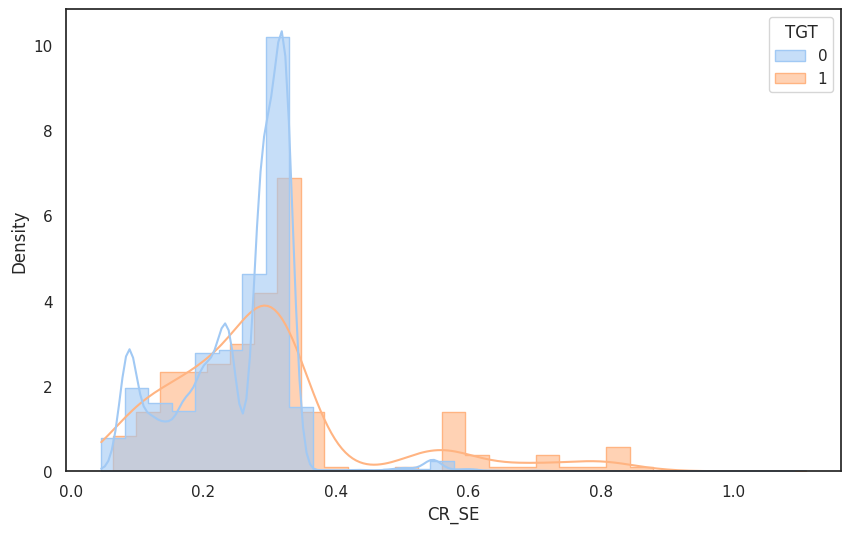

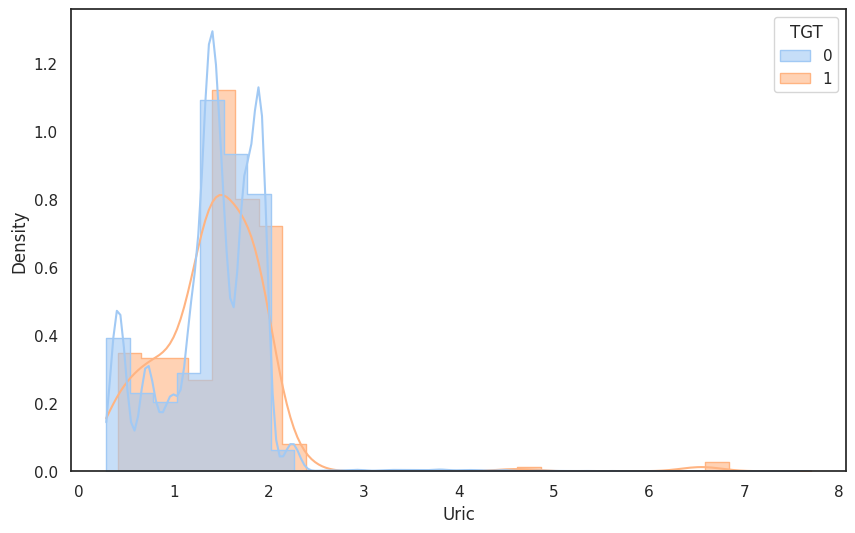

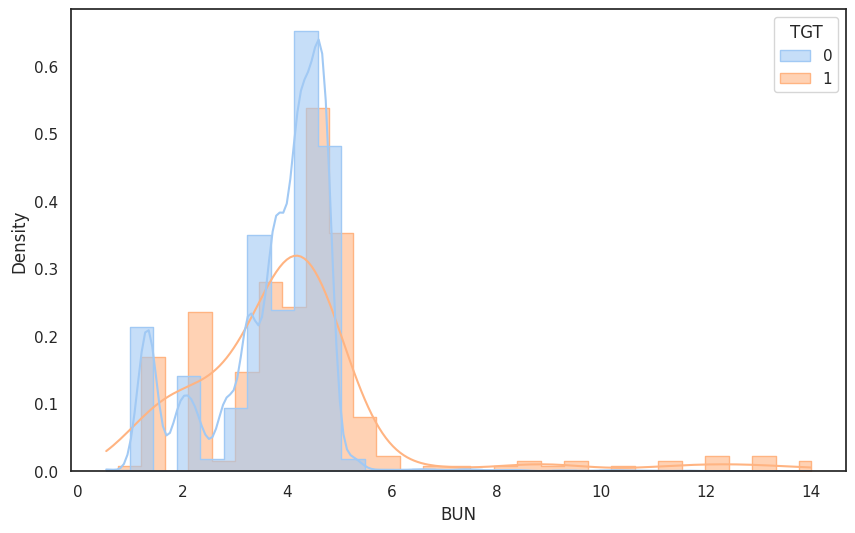

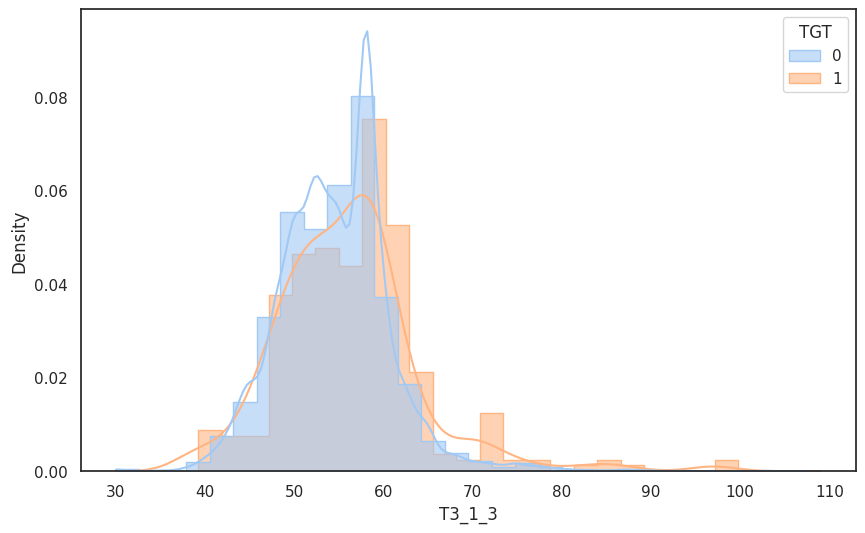

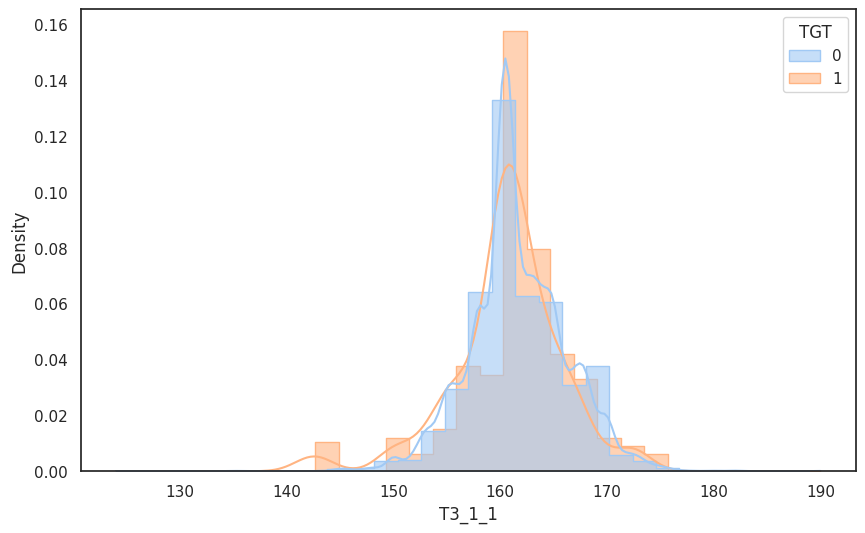

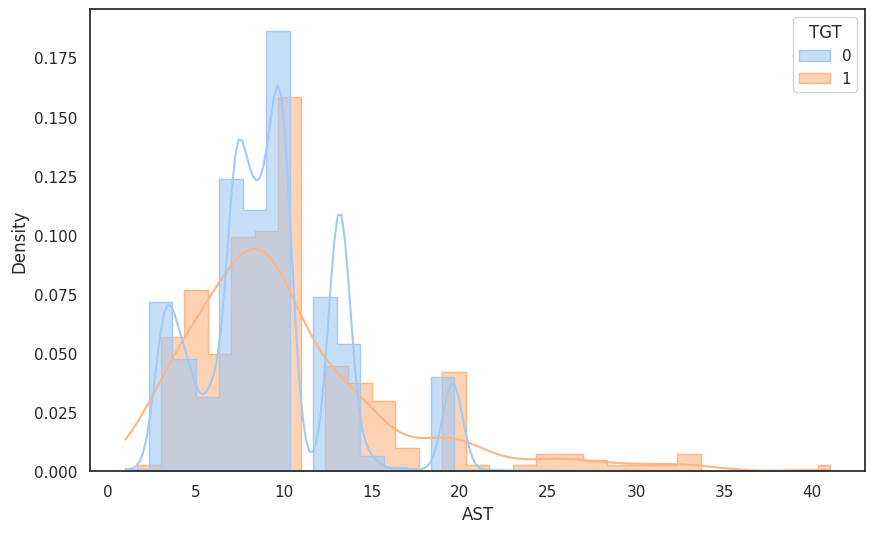

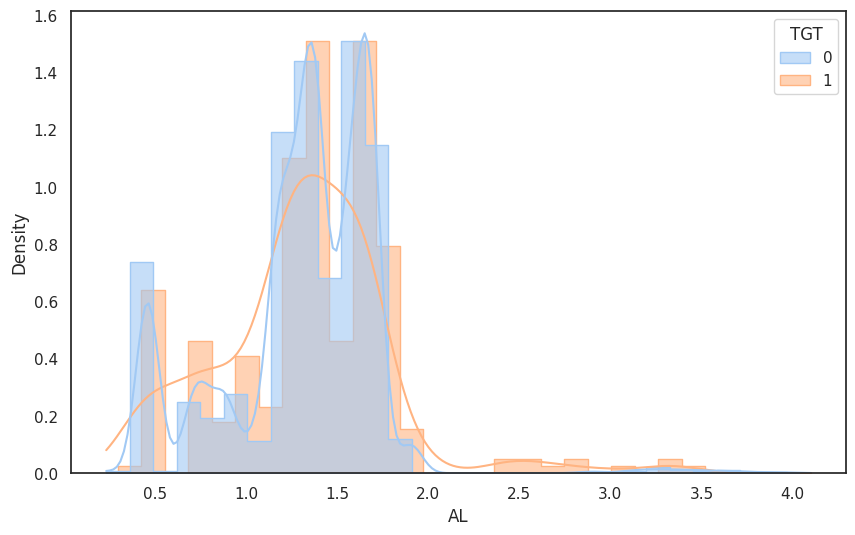

In [ ]:
#visualizations of key variables
key_variables = ['SBP', 'DBP', 'CAL', 'CR_SE', 'Uric', 'BUN', 'T3_1_3', 'T3_1_1', 'AST', 'AL']
for variables in key_variables:
    plt.figure(figsize = (10, 6))
    sns.histplot(data = cleaned_data, x=variables, hue = 'TGT', bins= 30, stat='density', kde=True, element='step', alpha=0.6, common_norm=False,
    multiple='dodge')
    #plt.title(f"Distribution of {variables} by TGT")
    plt.xlabel(variables)
    plt.show()

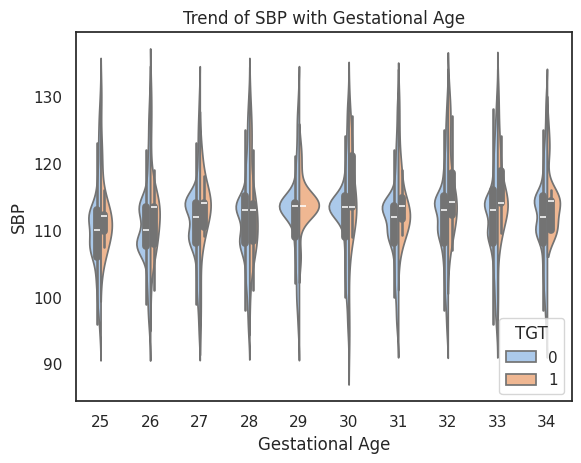

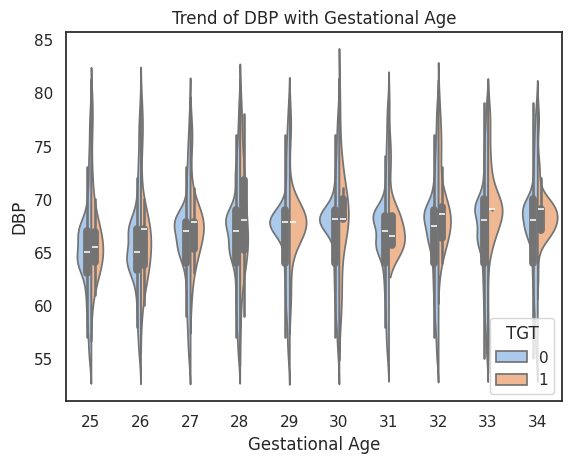

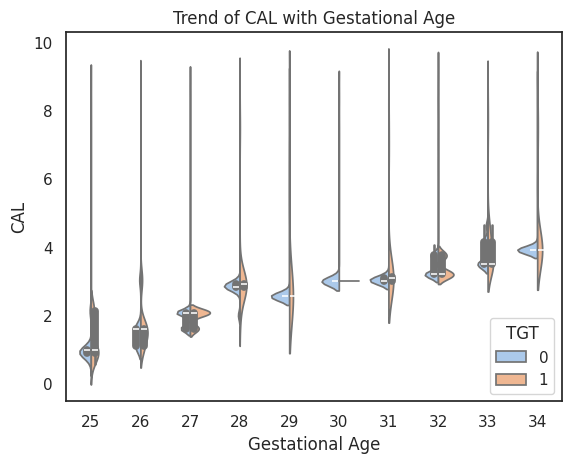

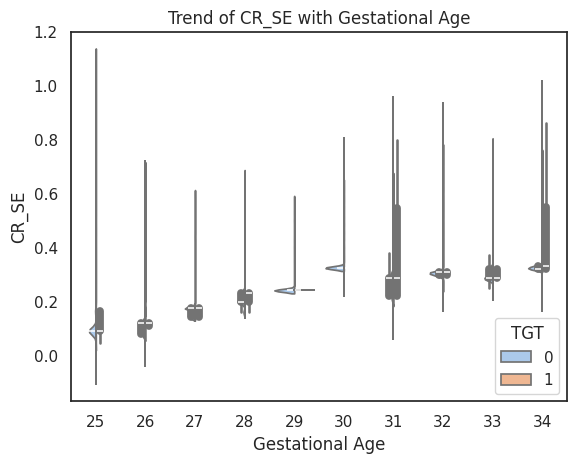

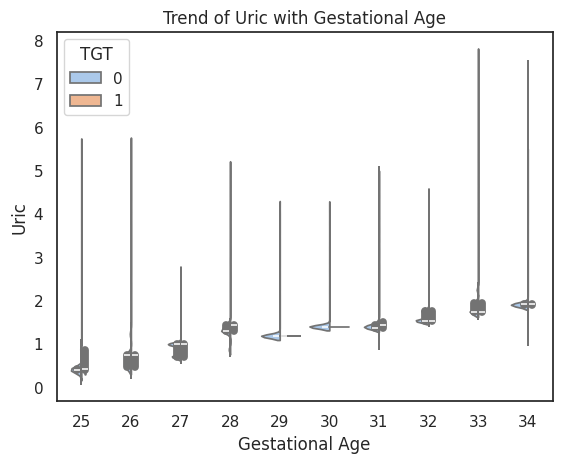

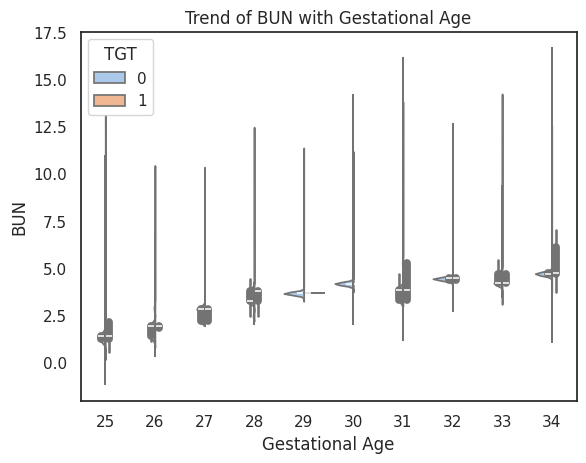

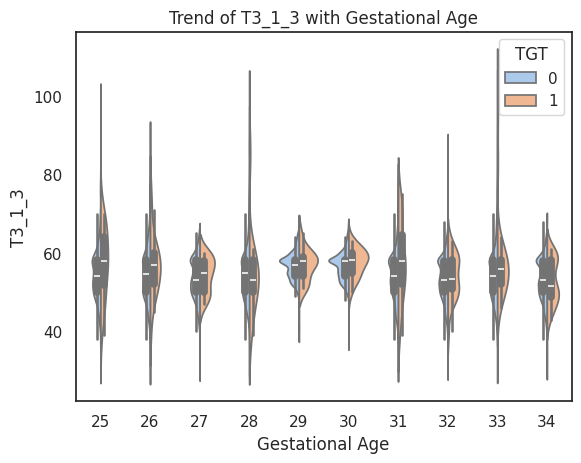

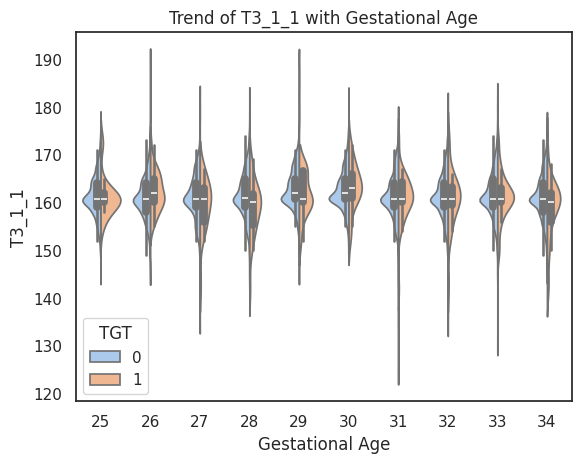

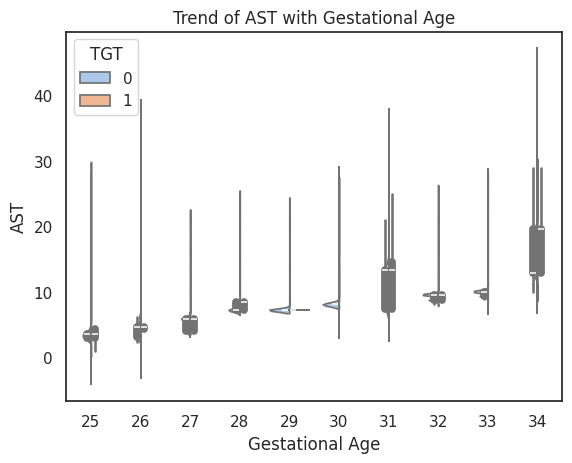

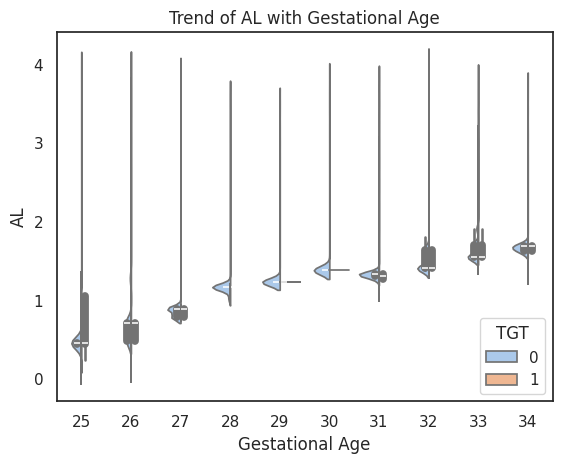

In [ ]:
#trend with gestational age
color_palettes = [
    {0: 'navy', 1: 'crimson'},
    {0: 'teal', 1: 'goldenrod'},
    {0: 'darkgreen', 1: 'indianred'},
    {0: 'slateblue', 1: 'coral'},
    {0: 'darkcyan', 1: 'firebrick'},
    {0: 'red', 1: 'black'},
    {0: 'navy', 1: 'teal'},
    {0: 'blue', 1: 'red'},
    {0: 'green', 1: 'orange'},
    {0: 'purple', 1: "brown"}
]
features = ['SBP', 'DBP', 'CAL', 'CR_SE', 'Uric', 'BUN', 'T3_1_3', 'T3_1_1', 'AST', 'AL']
for i, feature in enumerate(features):
    sns.violinplot(data=cleaned_data, x='PREG_WK', y=feature, hue='TGT', split=True)
    plt.title(f"Trend of {feature} with Gestational Age")
    plt.xlabel("Gestational Age")
    plt.ylabel(feature)
    plt.show()

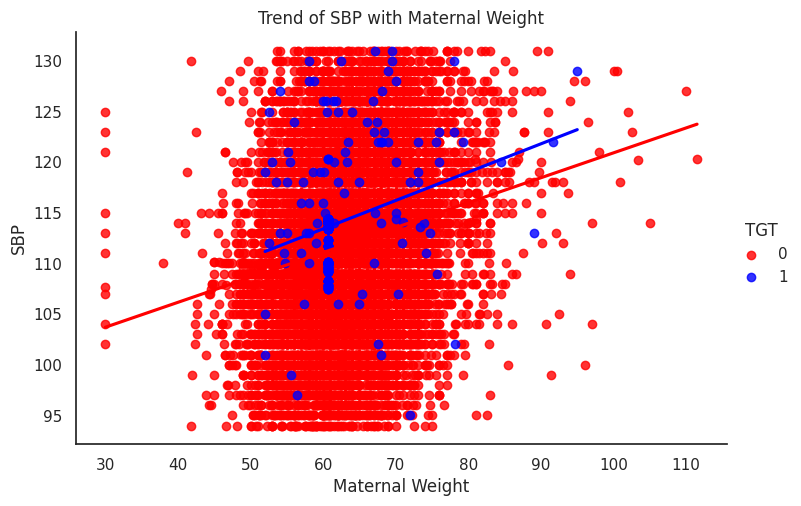

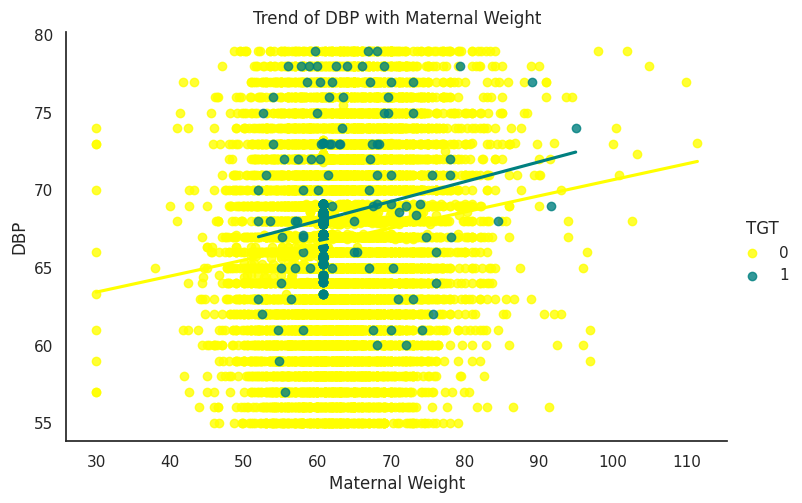

In [ ]:
#weight vs blood pressure(SBP, DBP)

blood_pressure = ['SBP', 'DBP']
color_list = [
    {0: 'red', 1: 'blue'},
    {0: 'yellow', 1: 'teal'}
]

for i, pressure in enumerate(blood_pressure):
    sns.lmplot(data = cleaned_data , x = "T3_1_2",
               y=pressure, hue='TGT', palette=color_list[i % len(color_palettes)], aspect=1.5, ci=None)
    plt.title(f"Trend of {pressure} with Maternal Weight")
    plt.xlabel("Maternal Weight")
    plt.ylabel(pressure)
    plt.show()




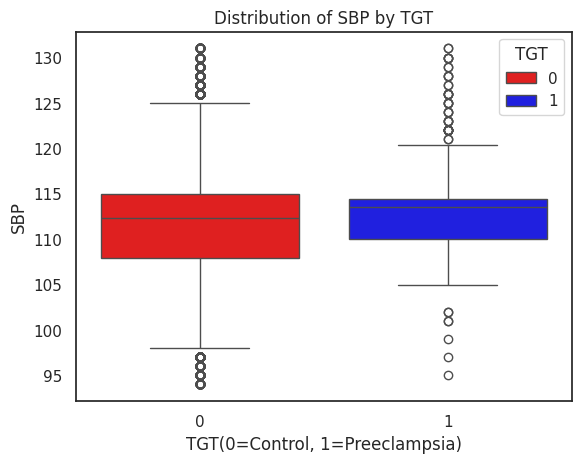

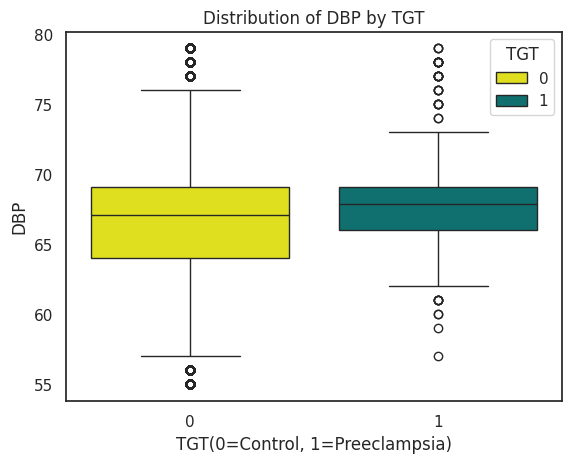

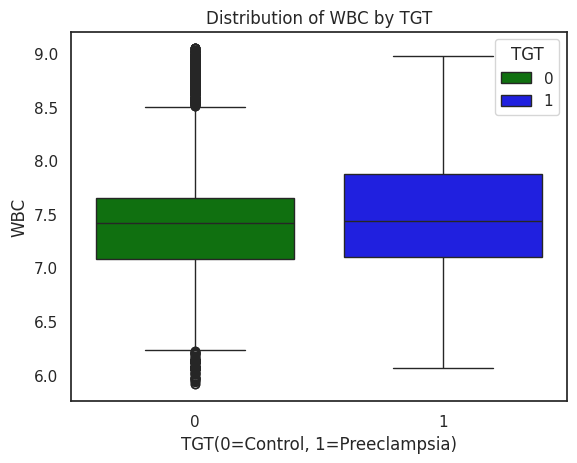

In [ ]:
#clinical markers with TGT
inflammatory_markers = ['SBP', 'DBP', 'WBC']
palette = [
    {0: 'red', 1: 'blue'},
    {0: 'yellow', 1: 'teal'},
    {0: 'green', 1: 'blue'}
]
for i, marker in enumerate(inflammatory_markers):
    sns.boxplot(data = cleaned_data , x = "TGT",
               y=marker, hue='TGT', palette=palette[i % len(palette)])
    plt.title(f"Distribution of {marker} by TGT")
    plt.xlabel("TGT(0=Control, 1=Preeclampsia)")
    plt.ylabel(marker)
    plt.show()

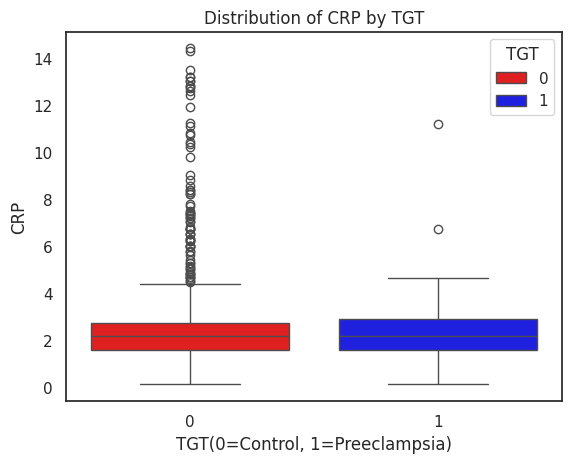

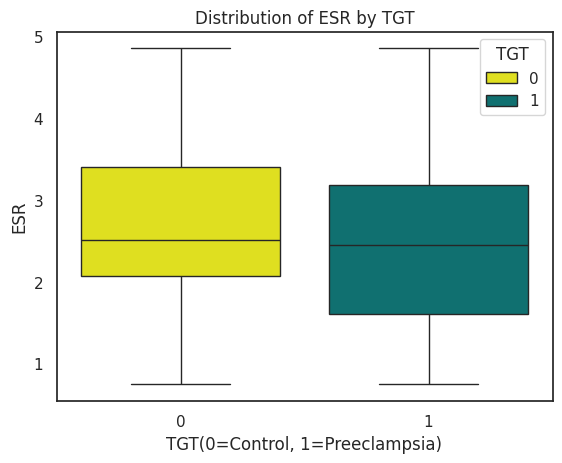

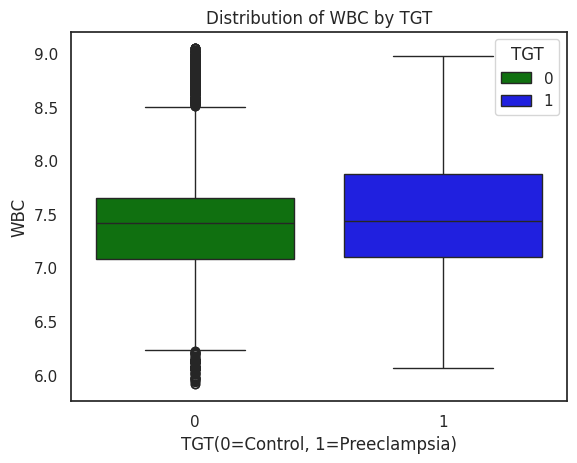

In [ ]:
#inflammatory markers with TGT
inflammatory_markers = ['CRP', 'ESR', 'WBC']
palette = [
    {0: 'red', 1: 'blue'},
    {0: 'yellow', 1: 'teal'},
    {0: 'green', 1: 'blue'}
]
for i, marker in enumerate(inflammatory_markers):
    sns.boxplot(data = cleaned_data , x = "TGT",
               y=marker, hue='TGT', palette=palette[i % len(palette)])
    plt.title(f"Distribution of {marker} by TGT")
    plt.xlabel("TGT(0=Control, 1=Preeclampsia)")
    plt.ylabel(marker)
    plt.show()

In [ ]:
!pip install statannotations

In [ ]:
# If height is in cm
cleaned_data['BMI'] = cleaned_data['T3_1_2'] / ((cleaned_data['T3_1_1'] / 100) ** 2)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:8.150e-01 U_stat=2.350e+06


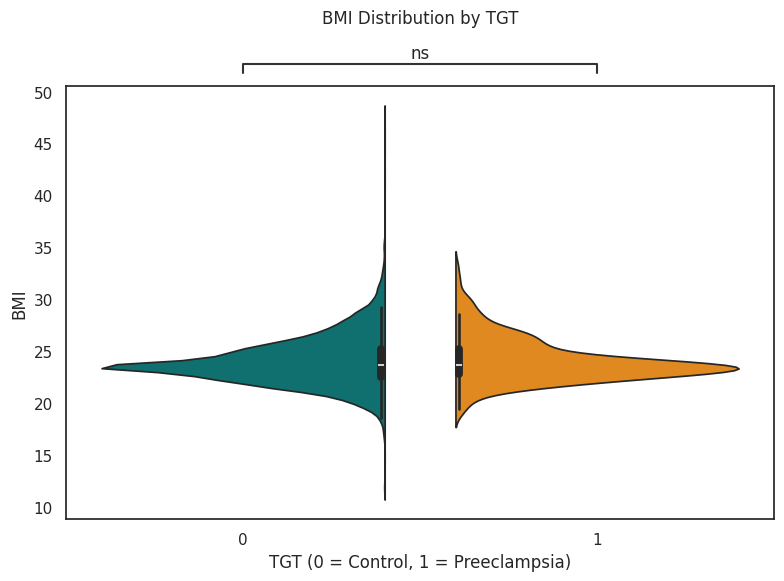

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:5.273e-08 U_stat=1.937e+06


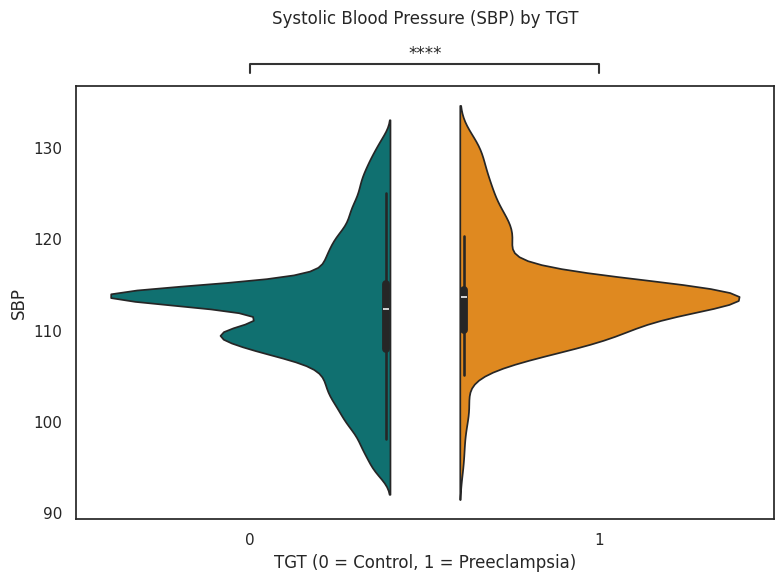

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.613e-07 U_stat=1.974e+06


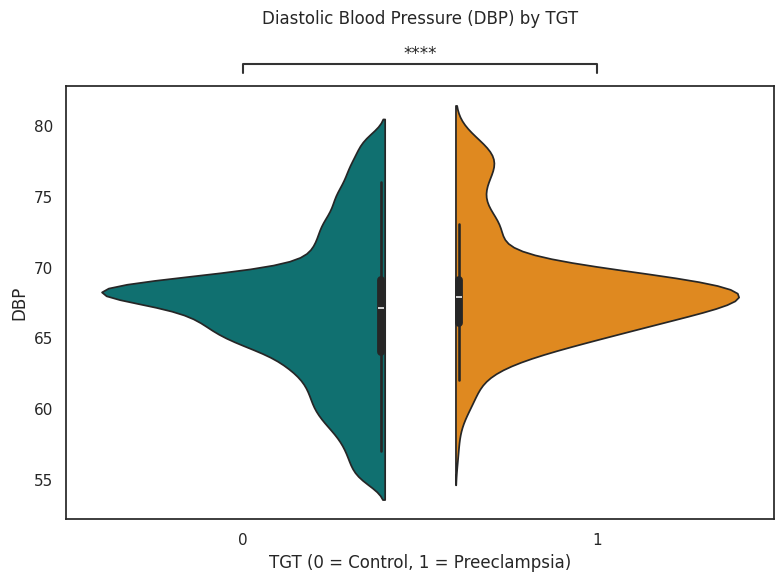

In [ ]:
# Variables to plot
from statannotations.Annotator import Annotator
variables = ['BMI', 'SBP', 'DBP']
titles = {
    'BMI': 'BMI Distribution by TGT',
    'SBP': 'Systolic Blood Pressure (SBP) by TGT',
    'DBP': 'Diastolic Blood Pressure (DBP) by TGT'
}

# Custom color palette
palette = {0: 'teal', 1: 'darkorange'}

# Seaborn style without gridlines
sns.set(style="white", palette="pastel")

# Group pairs for annotation (assuming binary TGT: 0 vs 1)
pairs = [(0, 1)]

# Loop through variables and generate annotated violin plots
for var in variables:
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.violinplot(
        data=cleaned_data,
        x="TGT",
        y=var,
        hue="TGT",
        split=True,
        inner="box",
        palette=palette,
        ax=ax
    )

    # Add statistical annotation
    annotator = Annotator(
        ax=ax,
        pairs=pairs,
        data=cleaned_data,
        x="TGT",
        y=var
    )
    annotator.configure(
        test='Mann-Whitney',
        text_format='star',
        loc='outside',
        comparisons_correction=None
    )
    annotator.apply_and_annotate()

    ax.set_title(titles[var], pad=20, y=1.08)
    ax.set_xlabel("TGT (0 = Control, 1 = Preeclampsia)")
    ax.set_ylabel(var)
    ax.legend_.remove()
    ax.grid(False)

    plt.tight_layout()
    plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.214e-01 U_stat=2.490e+06


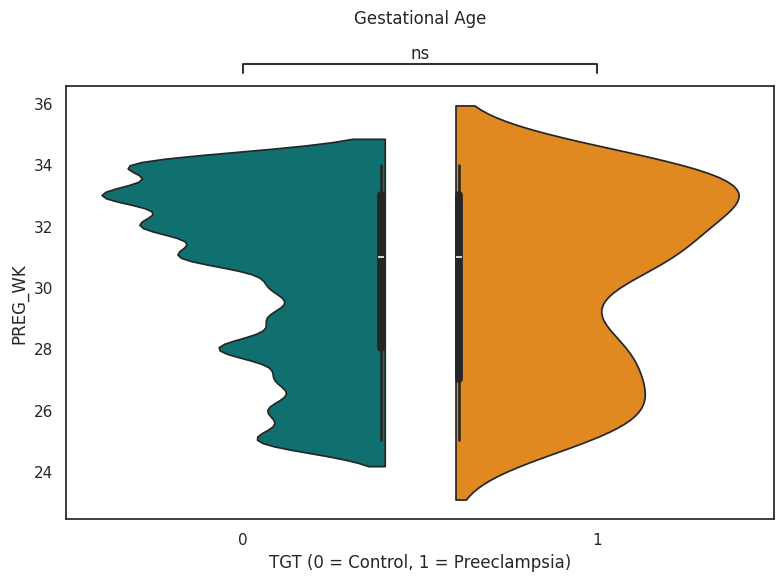

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:5.273e-08 U_stat=1.937e+06


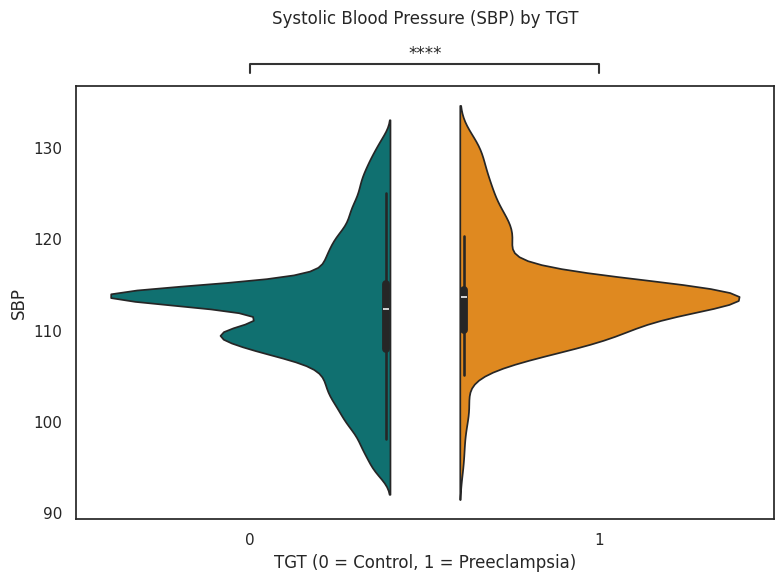

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.613e-07 U_stat=1.974e+06


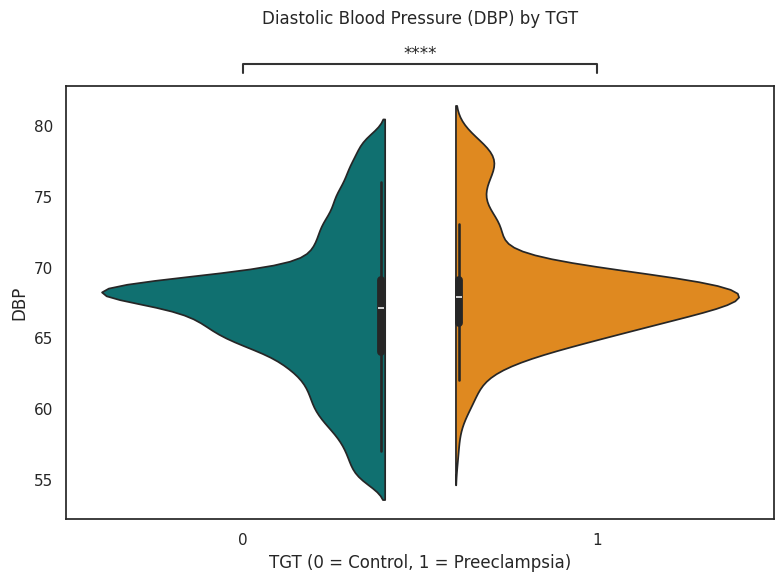

In [ ]:
# Variables to plot
variables = ['PREG_WK', 'SBP', 'DBP']
titles = {
    'PREG_WK': 'Gestational Age',
    'SBP': 'Systolic Blood Pressure (SBP) by TGT',
    'DBP': 'Diastolic Blood Pressure (DBP) by TGT'
}

# Custom color palette
palette = {0: 'teal', 1: 'darkorange'}

# Seaborn style without gridlines
sns.set(style="white", palette="pastel")

# Group pairs for annotation (assuming binary TGT: 0 vs 1)
pairs = [(0, 1)]

# Loop through variables and generate annotated violin plots
for var in variables:
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.violinplot(
        data=cleaned_data,
        x="TGT",
        y=var,
        hue="TGT",
        split=True,
        inner="box",
        palette=palette,
        ax=ax
    )

    # Add statistical annotation
    annotator = Annotator(
        ax=ax,
        pairs=pairs,
        data=cleaned_data,
        x="TGT",
        y=var
    )
    annotator.configure(
        test='Mann-Whitney',
        text_format='star',
        loc='outside',
        comparisons_correction=None
    )
    annotator.apply_and_annotate()

    ax.set_title(titles[var], pad=20, y=1.08)
    ax.set_xlabel("TGT (0 = Control, 1 = Preeclampsia)")
    ax.set_ylabel(var)
    ax.legend_.remove()
    ax.grid(False)

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'CRP Distribution')

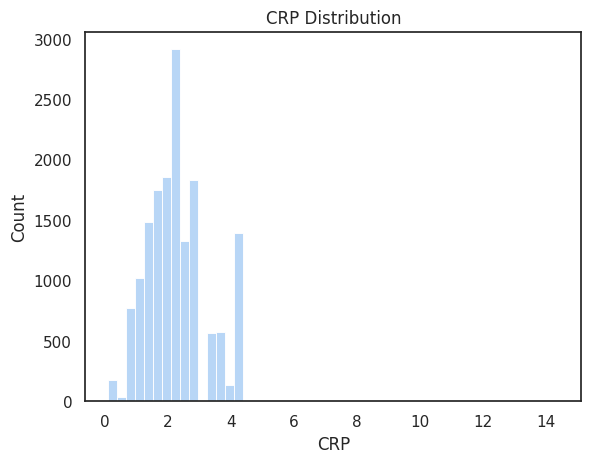

In [ ]:
sns.histplot(cleaned_data['CRP'], bins=50)
plt.title("CRP Distribution")

In [ ]:
cleaned_data['CRP'].describe()


,CRP
count,15935.000000
mean,2.293105
std,1.064872
min,0.109000
25%,1.588371
50%,2.161987
75%,2.729664
max,14.400000


# Model Building

In [ ]:
target = 'TGT'
X = cleaned_data.drop(columns=[target])
y = cleaned_data[target]

In [ ]:
X_majority  = X[y == 0]
X_minority = X[y == 1]
y_majority = y[y == 0]
y_minority = y[y == 1]

X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority, replace=False, n_samples=800, random_state = 42)

X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority, replace=True, n_samples=600, random_state=42)

X_balanced = pd.concat([X_majority_downsampled, X_minority_upsampled])
y_balanced = pd.concat([y_majority_downsampled, y_minority_upsampled])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


KNeighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       162
           1       0.64      0.72      0.68       118

    accuracy                           0.71       280
   macro avg       0.71      0.72      0.71       280
weighted avg       0.72      0.71      0.72       280



In [ ]:
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

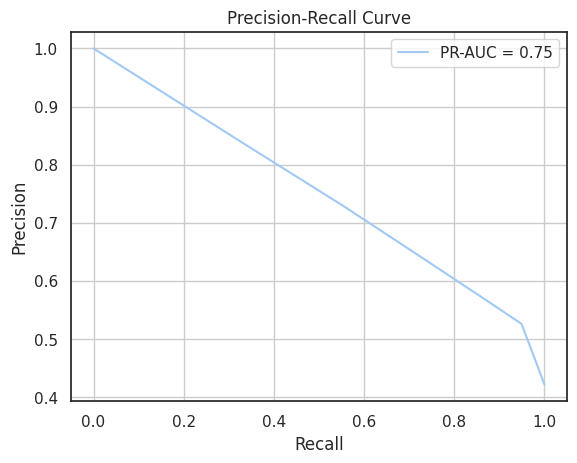

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_knn)
pr_auc_knn = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_knn:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

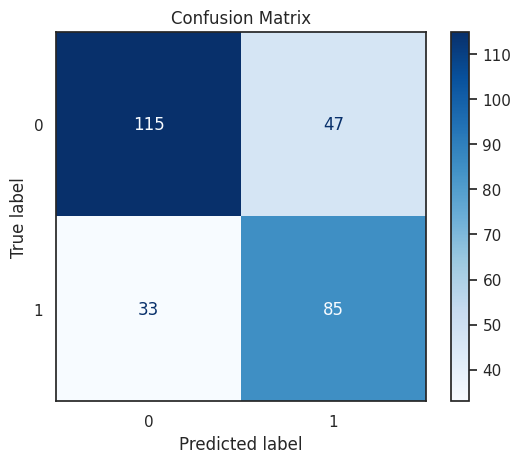

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
bal_acc_knn = balanced_accuracy_score(y_test, y_pred_knn)
print(f'Balanced Accuracy: {bal_acc_knn:.2f}')

Balanced Accuracy: 0.72


Stochastic Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gb = model.predict(X_test_scaled)
y_prob_gb = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[130  32]
 [ 33  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       162
           1       0.73      0.72      0.72       118

    accuracy                           0.77       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.77      0.77      0.77       280



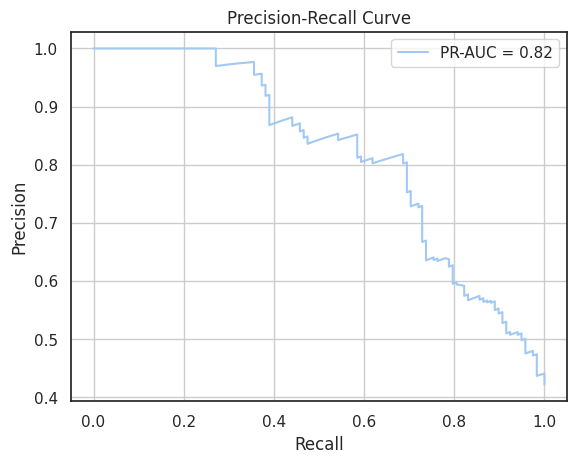

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_gb)
pr_auc_gb = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_gb:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
print(f'Balanced Accuracy: {bal_acc_gb:.2f}')

Balanced Accuracy: 0.76


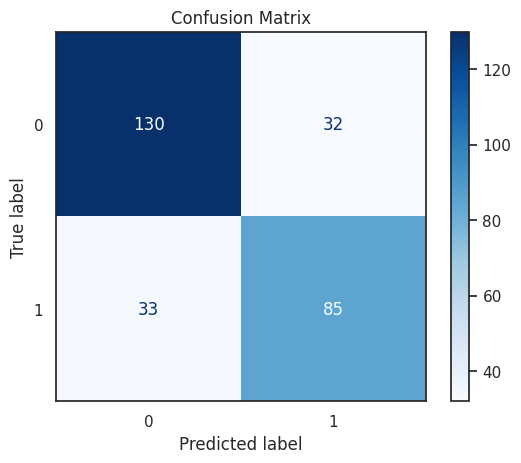

In [ ]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

Confusion Matrix:
 [[139  23]
 [ 28  90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       162
           1       0.80      0.76      0.78       118

    accuracy                           0.82       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.82      0.82      0.82       280



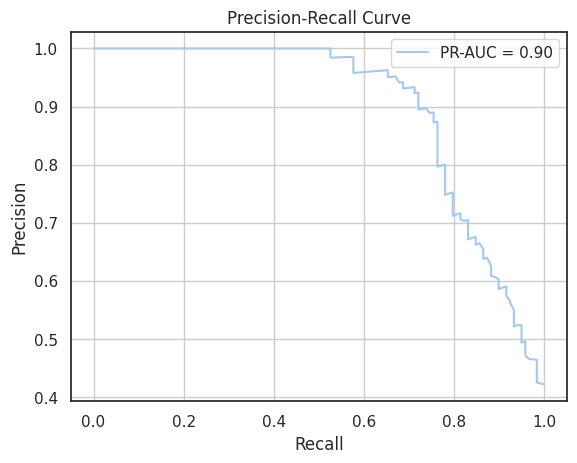

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_rf:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

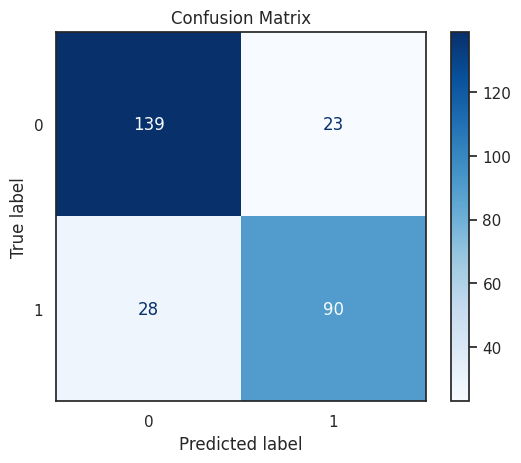

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
bal_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f'Balanced Accuracy: {bal_acc_knn:.2f}')

Balanced Accuracy: 0.72


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           scoring='average_precision', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


[[133  29]
 [ 28  90]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       162
           1       0.76      0.76      0.76       118

    accuracy                           0.80       280
   macro avg       0.79      0.79      0.79       280
weighted avg       0.80      0.80      0.80       280

Balanced Accuracy: 0.7918497593638836


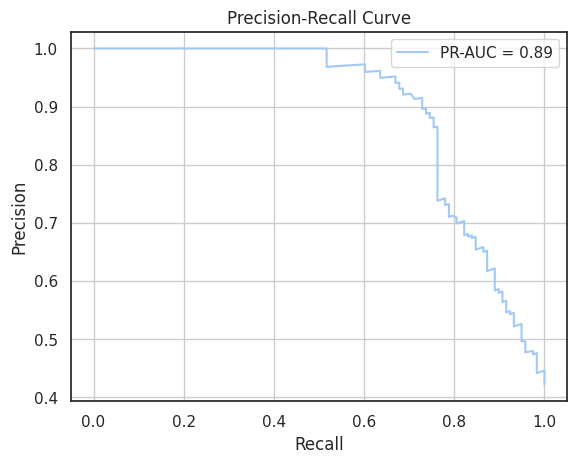

PR-AUC Score: 0.892232685333465


In [ ]:
y_pred_proba_grid = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_grid = best_model.predict(X_test_scaled)

# Confusion matrix and classification metrics
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_grid))

# PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_grid)
pr_auc_score = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
print("PR-AUC Score:", pr_auc_score)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


   Feature  Importance
30     BMI    0.133901
29  T3_1_3    0.113515
27  T3_1_1    0.108516
28  T3_1_2    0.107397
25     DBP    0.095284
24     SBP    0.085059
19    Tpro    0.043264
16     PLT    0.043164
8    CR_SE    0.027243
6      CAL    0.018705
23     WBC    0.018672
12     Glu    0.016322
5      BUN    0.016061
9      CRP    0.015306
14       K    0.015057


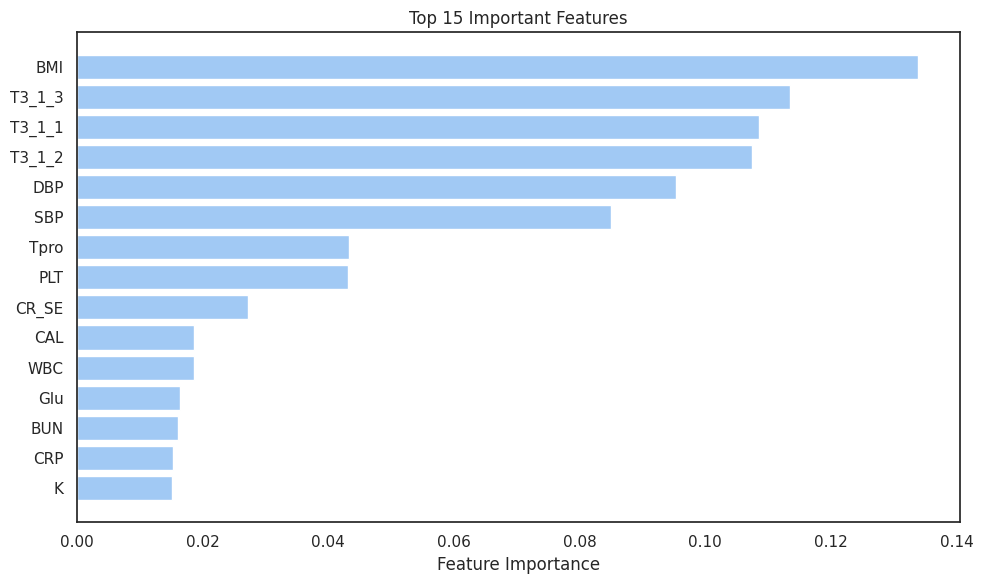

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print(feat_imp_df.head(15))

# Optional: plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()

Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

Confusion Matrix:
 [[92 70]
 [31 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.57      0.65       162
           1       0.55      0.74      0.63       118

    accuracy                           0.64       280
   macro avg       0.65      0.65      0.64       280
weighted avg       0.67      0.64      0.64       280



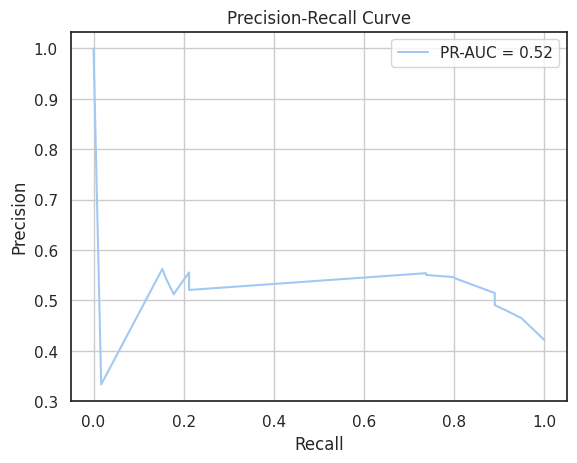

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_dt)
pr_auc_dt = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_dt:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_dt = balanced_accuracy_score(y_test, y_pred_dt)
print(f'Balanced Accuracy: {bal_acc_dt:.2f}')

Balanced Accuracy: 0.65


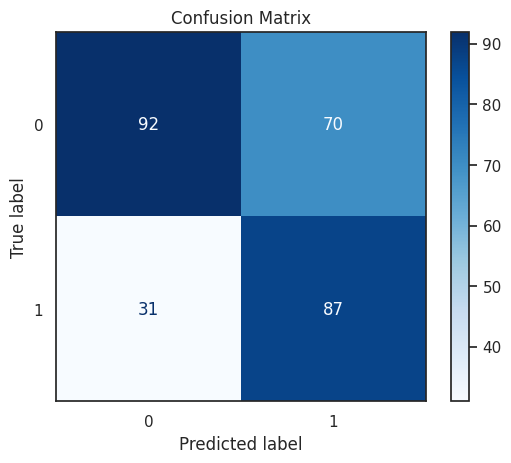

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr= lr_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_lr))

Confusion Matrix:
 [[125  37]
 [ 68  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70       162
           1       0.57      0.42      0.49       118

    accuracy                           0.62       280
   macro avg       0.61      0.60      0.60       280
weighted avg       0.62      0.62      0.61       280



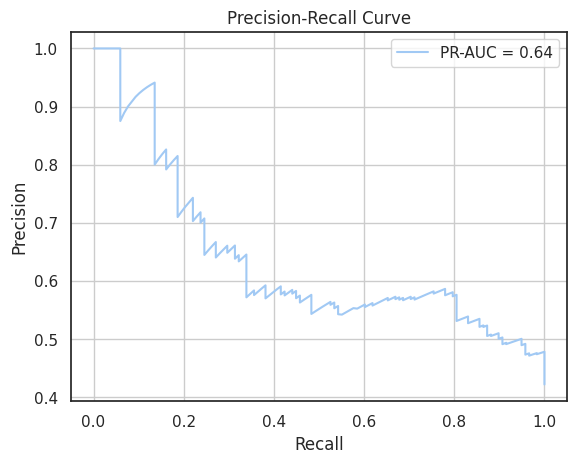

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
pr_auc_lr = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_lr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_lr = balanced_accuracy_score(y_test, y_pred_lr)
print(f'Balanced Accuracy: {bal_acc_lr:.2f}')

Balanced Accuracy: 0.60


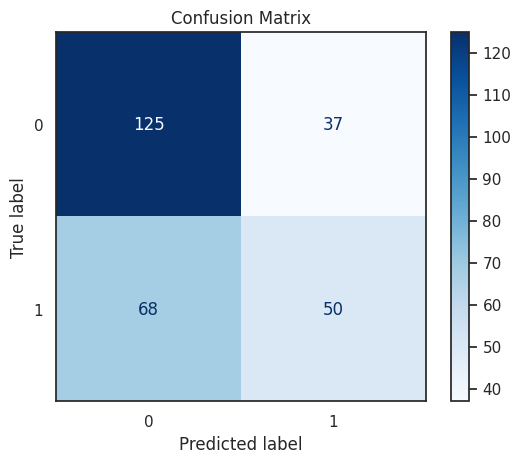

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_nb))

Confusion Matrix:
 [[123  39]
 [ 64  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.70       162
           1       0.58      0.46      0.51       118

    accuracy                           0.63       280
   macro avg       0.62      0.61      0.61       280
weighted avg       0.63      0.63      0.62       280



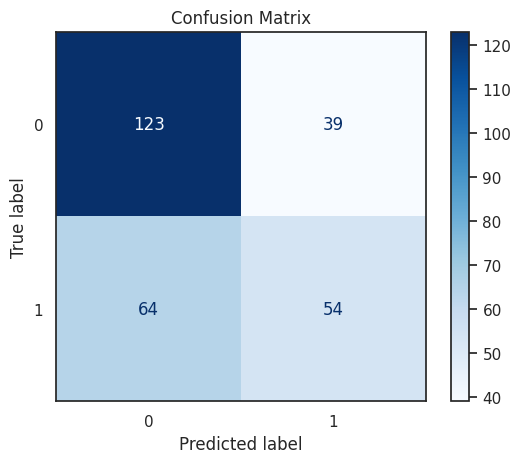

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

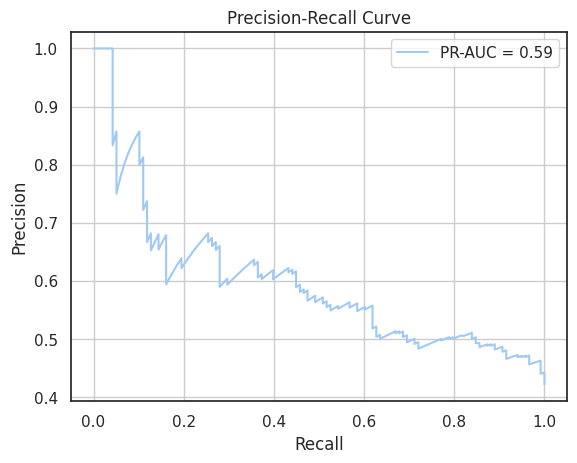

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_nb)
pr_auc_nb = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_nb:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_nb = balanced_accuracy_score(y_test, y_pred_nb)
print(f'Balanced Accuracy: {bal_acc_nb:.2f}')

Balanced Accuracy: 0.61


Support Vector Classifier

In [ ]:
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [ ]:
y_pred_svc = svc_model.predict(X_test_scaled)
y_prob_svc = svc_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[137  25]
 [ 51  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78       162
           1       0.73      0.57      0.64       118

    accuracy                           0.73       280
   macro avg       0.73      0.71      0.71       280
weighted avg       0.73      0.73      0.72       280



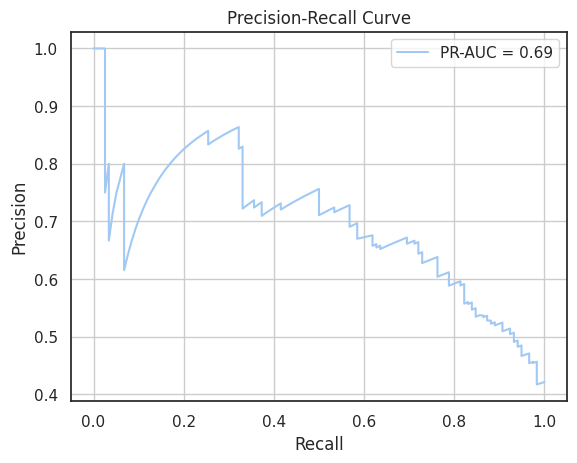

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_svc)
pr_auc_svc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_svc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_svc = balanced_accuracy_score(y_test, y_pred_svc)
print(f'Balanced Accuracy: {bal_acc_svc:.2f}')

Balanced Accuracy: 0.71


Logistic Regression with Elastic Net Regularization

In [ ]:
en_model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    C=1.0,
    max_iter=1000,
    random_state=42
)
en_model.fit(X_train_scaled, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [ ]:
y_pred_en = model.predict(X_test_scaled)
y_prob_en = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_en))
print("\nClassification Report:\n", classification_report(y_test, y_pred_en))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[130  32]
 [ 33  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       162
           1       0.73      0.72      0.72       118

    accuracy                           0.77       280
   macro avg       0.76      0.76      0.76       280
weighted avg       0.77      0.77      0.77       280



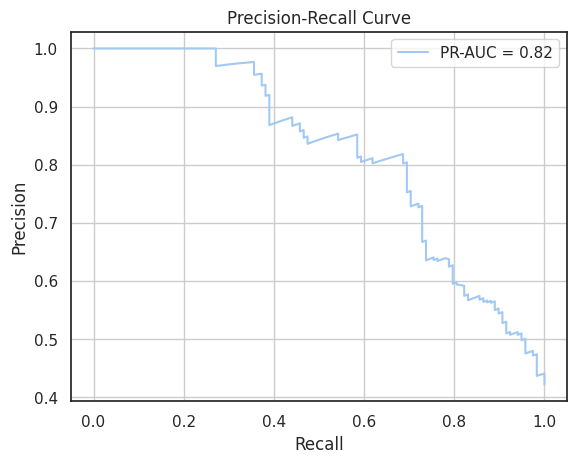

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_en)
pr_auc_en = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_en:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_en = balanced_accuracy_score(y_test, y_pred_en)
print(f'Balanced Accuracy: {bal_acc_en:.2f}')

Balanced Accuracy: 0.76


Extreme Gradient Boosting (XGBoost)

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [ ]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[128  34]
 [ 30  88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       162
           1       0.72      0.75      0.73       118

    accuracy                           0.77       280
   macro avg       0.77      0.77      0.77       280
weighted avg       0.77      0.77      0.77       280



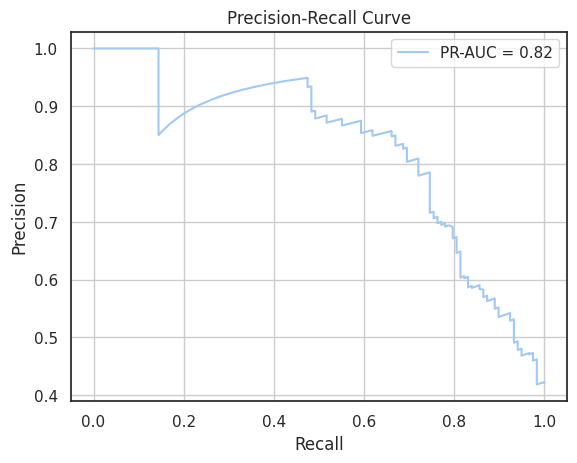

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_xgb)
pr_auc_xgb = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_xgb:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print(f'Balanced Accuracy: {bal_acc_xgb:.2f}')

Balanced Accuracy: 0.77


Logistic Regression with Ridge Regularization

In [ ]:
ridge_model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    C=1.0,
    max_iter=1000,
    random_state=42
)
ridge_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_prob_ridge = ridge_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_ridge))

Confusion Matrix:
 [[125  37]
 [ 68  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70       162
           1       0.57      0.42      0.49       118

    accuracy                           0.62       280
   macro avg       0.61      0.60      0.60       280
weighted avg       0.62      0.62      0.61       280



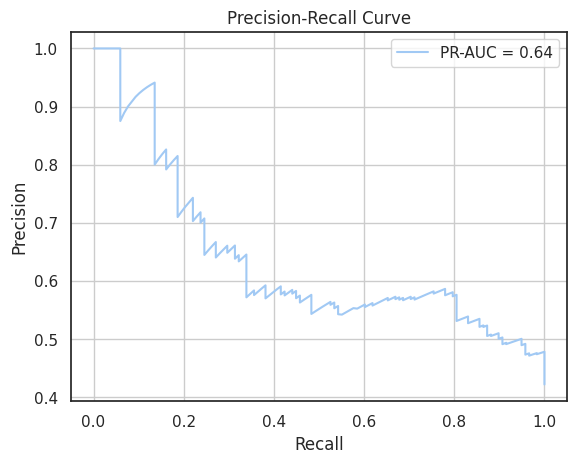

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_ridge)
pr_auc_ridge = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_ridge:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Ensemble Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('sgb', model),
        ('elasticnet', en_model),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

In [ ]:
ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_proba_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_ensemble))

Confusion Matrix:
 [[131  31]
 [ 30  88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       162
           1       0.74      0.75      0.74       118

    accuracy                           0.78       280
   macro avg       0.78      0.78      0.78       280
weighted avg       0.78      0.78      0.78       280



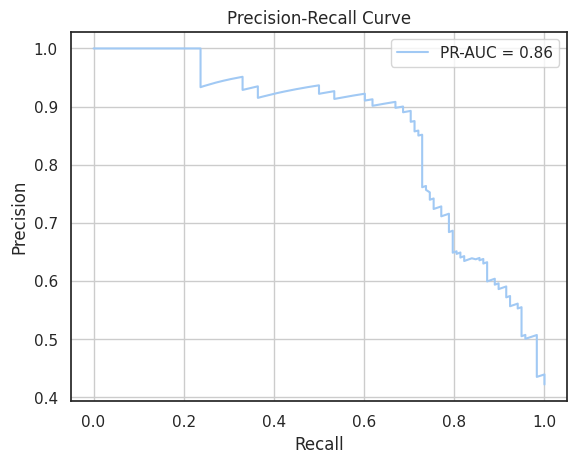

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_ensemble)
pr_auc_ensemble = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_ensemble:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_ensemble = balanced_accuracy_score(y_test, y_pred_ensemble)
print(f'Balanced Accuracy: {bal_acc_ensemble:.2f}')

Balanced Accuracy: 0.78


Stacking ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# Base learners
estimators = [
    ('sgb', model),
    ('elasticnet', en_model),
    ('rf', rf_model )
]
# Meta-learner (final estimator)
meta_model = xgb_model


In [ ]:
stacked_model = StackingClassifier(
    estimators= estimators,
    final_estimator=meta_model,
    cv=5,
    passthrough=True
)


In [ ]:
stacked_model.fit(X_train_scaled, y_train)
y_pred_stacked = stacked_model.predict(X_test_scaled)
y_proba_stacked = stacked_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacked))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacked))
#print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_stacked))

Confusion Matrix:
 [[146  16]
 [ 31  87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       162
           1       0.84      0.74      0.79       118

    accuracy                           0.83       280
   macro avg       0.83      0.82      0.82       280
weighted avg       0.83      0.83      0.83       280



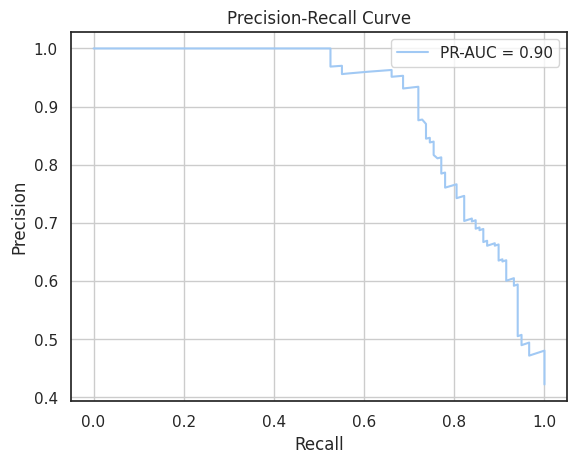

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_stacked)
pr_auc_stacked = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc_stacked:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
bal_acc_stacked = balanced_accuracy_score(y_test, y_pred_stacked)
print(f'Balanced Accuracy: {bal_acc_stacked:.2f}')

Balanced Accuracy: 0.82


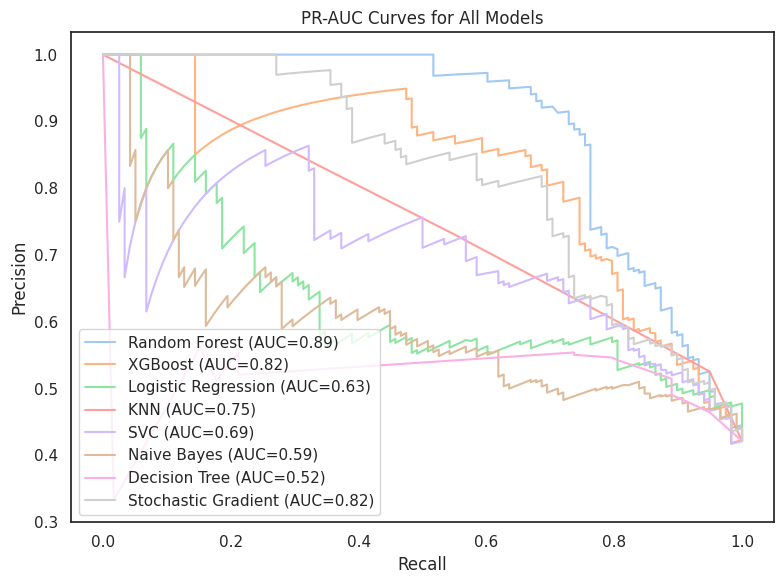

In [ ]:


plt.figure(figsize=(8, 6))

models = {
    "Random Forest": best_model,
    "XGBoost": xgb_model,
    "Logistic Regression": en_model,
    "KNN": knn,
    "SVC": svc_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "Stochastic Gradient": model,
}

for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, threshhold = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUC={pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-AUC Curves for All Models")
plt.legend(loc="lower left")
plt.grid(False)
plt.tight_layout()
plt.show()

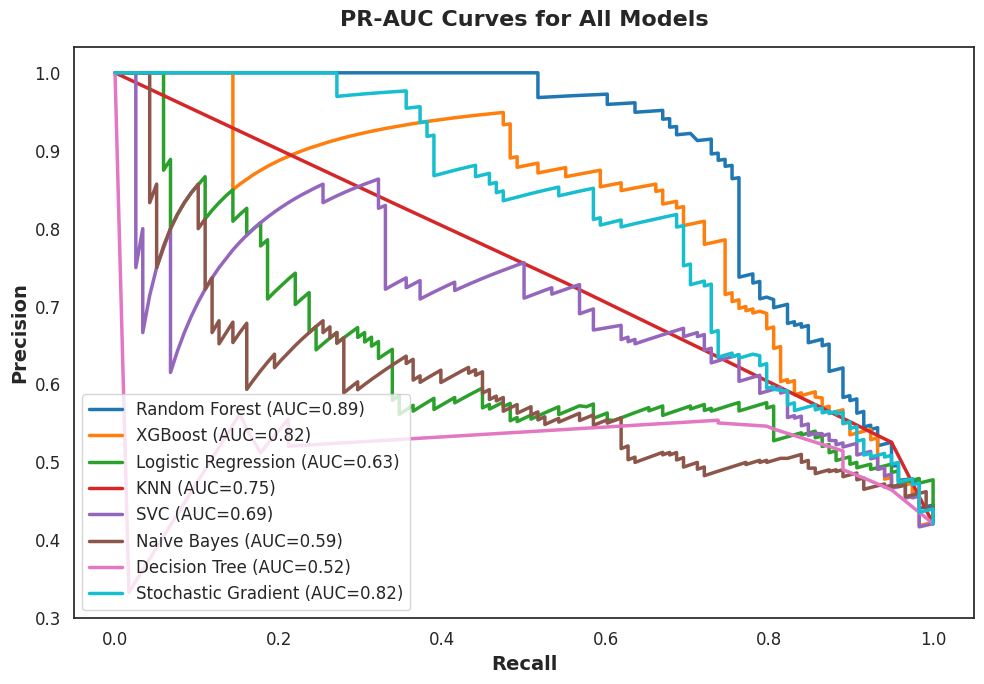

In [ ]:
plt.figure(figsize=(10, 7))

# Define strong, vivid colors manually
color_palette = {
    "Random Forest": "#1f77b4",    # strong blue
    "XGBoost": "#ff7f0e",          # vivid orange
    "Logistic Regression": "#2ca02c",  # green
    "KNN": "#d62728",              # red
    "SVC": "#9467bd",              # purple
    "Naive Bayes": "#8c564b",      # brown
    "Decision Tree": "#e377c2",    # pink
    "Stochastic Gradient": "#17becf"  # cyan
}

models = {
    "Random Forest": best_model,
    "XGBoost": xgb_model,
    "Logistic Regression": en_model,
    "KNN": knn,
    "SVC": svc_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "Stochastic Gradient": model,
}

# Plot PR curves
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision,
             label=f"{name} (AUC={pr_auc:.2f})",
             linewidth=2.5,
             color=color_palette[name])

# Plot styling
plt.xlabel("Recall", fontsize=14, fontweight='bold')
plt.ylabel("Precision", fontsize=14, fontweight='bold')
plt.title("PR-AUC Curves for All Models", fontsize=16, fontweight='bold', pad=15)
plt.legend(loc="lower left", fontsize=12)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
